In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
import os
path = os.getcwd()

In [3]:
video_dataset_dir = os.path.dirname('C:\\Users\\Ta Quang Ngoc\\Desktop\\SignDataset\\')
words = os.listdir(video_dataset_dir)
print(words)
list_videos_dir = []
for word in words:
    list_videos_dir.append(os.path.join(video_dataset_dir, word))

['all.npy', 'all1.npy', 'an_mung', 'an_ui', 'ap_dung', 'ban_khoan', 'benh_nhan', 'be_mac', 'biet', 'bieu_tang', 'bo_y_te', 'cach_ly', 'cam_do', 'cam_on', 'can', 'chap_nhan', 'chay', 'cho', 'dau', 'day_do', 'ghet', 'giup', 'ham_mo', 'hi_sinh', 'ho', 'ket_hon', 'khai_bao', 'khau_trang', 'khu_cach_ly', 'labels.npy', 'lay_benh', 'lo_lang', 'nghi_ngoi', 'nho', 'noi_xau', 'non_oi', 'phat', 'phong_van', 'phuc_hoi', 'san_se', 'sot', 'tap_luyen', 'tham', 'that_lac', 'thich', 'thuong', 'ung_ho', 'u_benh', 'vang_loi', 'virus', 'xin_phep', 'xuat_vien', 'yeu']


In [4]:
mp_holistic = mp.solutions.holistic 
mp_drawing = mp.solutions.drawing_utils

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False                 
    results = model.process(image)                
    image.flags.writeable = True                   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

def draw_styled_landmarks(image, results):

    # left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

def extract_keypoints(results):
    key1 = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    key2 = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

In [6]:
DATA_PATH = os.path.join('hand_dataset')
sequence_length = 30

In [7]:
for word in words:
    videos_dir = os.path.join(video_dataset_dir, word)
    for video in os.listdir(videos_dir):
        video_path = os.path.join(videos_dir, video)
        cap = cv2.VideoCapture(video_path)
        video = video.replace('.mp4', '')
        os.makedirs(os.path.join(DATA_PATH, word, video))
        with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

            for frame_num in range(1, sequence_length + 1):
                ret, frame = cap.read()
                image, results = mediapipe_detection(frame, holistic)

                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, word, video, str(frame_num))
                print(npy_path)
                np.save(npy_path, keypoints)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'hand_dataset\\an_mung\\N10_an_mung_0'

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [8]:
actions = ['ăn mừng', 'an ủi', 'áp dụng', 'băn khoăn', 'bệnh nhân', 'bế mạc', 'biết', 'biếu tặng', 'bộ y tế', 'cách ly', 'cám dỗ', 'cảm ơn', 'cần', 'chấp nhận', 'chạy', 'cho', 'dấu', 'dạy dỗ', 'ghét', 'giúp', 'hâm mộ', 'hi sinh', 'ho', 'kết hôn', 'khai báo', 'khẩu trang', 'khu cách ly', 'lây bệnh', 'lo lắng', 'nghỉ ngơi', 'nhớ', 'nói xấu', 'nôn ói', 'phát', 'phỏng vấn', 'phục hồi', 'san sẻ', 'sốt', 'tập luyện', 'thăm', 'thất lạc', 'thích', 'thương', 'ủng hộ', 'ủ bệnh', 'vâng lời', 'virus', 'xin phép', 'xuất viện', 'yêu']
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'ăn mừng': 0,
 'an ủi': 1,
 'áp dụng': 2,
 'băn khoăn': 3,
 'bệnh nhân': 4,
 'bế mạc': 5,
 'biết': 6,
 'biếu tặng': 7,
 'bộ y tế': 8,
 'cách ly': 9,
 'cám dỗ': 10,
 'cảm ơn': 11,
 'cần': 12,
 'chấp nhận': 13,
 'chạy': 14,
 'cho': 15,
 'dấu': 16,
 'dạy dỗ': 17,
 'ghét': 18,
 'giúp': 19,
 'hâm mộ': 20,
 'hi sinh': 21,
 'ho': 22,
 'kết hôn': 23,
 'khai báo': 24,
 'khẩu trang': 25,
 'khu cách ly': 26,
 'lây bệnh': 27,
 'lo lắng': 28,
 'nghỉ ngơi': 29,
 'nhớ': 30,
 'nói xấu': 31,
 'nôn ói': 32,
 'phát': 33,
 'phỏng vấn': 34,
 'phục hồi': 35,
 'san sẻ': 36,
 'sốt': 37,
 'tập luyện': 38,
 'thăm': 39,
 'thất lạc': 40,
 'thích': 41,
 'thương': 42,
 'ủng hộ': 43,
 'ủ bệnh': 44,
 'vâng lời': 45,
 'virus': 46,
 'xin phép': 47,
 'xuất viện': 48,
 'yêu': 49}

In [13]:
sequences, labels = [], []
for word in words:
    videos_dir = os.path.join(video_dataset_dir, word)
    for video in os.listdir(videos_dir):
        video = video.replace('.mp4', '')
        window = []
        for frame_num in range(1, sequence_length+1):
            res = np.load(os.path.join(DATA_PATH, word, video, "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[actions[words.index(word)]])
    print(word, " ok")

an_mung  ok
an_ui  ok
ap_dung  ok
ban_khoan  ok
benh_nhan  ok
be_mac  ok
biet  ok
bieu_tang  ok
bo_y_te  ok
cach_ly  ok
cam_do  ok
cam_on  ok
can  ok
chap_nhan  ok
chay  ok
cho  ok
dau  ok
day_do  ok
ghet  ok
giup  ok
ham_mo  ok
hi_sinh  ok
ho  ok
ket_hon  ok
khai_bao  ok
khau_trang  ok
khu_cach_ly  ok
lay_benh  ok
lo_lang  ok
nghi_ngoi  ok
nho  ok
noi_xau  ok
non_oi  ok
phat  ok
phong_van  ok
phuc_hoi  ok
san_se  ok
sot  ok
tap_luyen  ok
tham  ok
that_lac  ok
thich  ok
thuong  ok
ung_ho  ok
u_benh  ok
vang_loi  ok
virus  ok
xin_phep  ok
xuat_vien  ok
yeu  ok


In [14]:
X = np.array(sequences)
np.save("C:\\Users\\Ta Quang Ngoc\\Desktop\\SignDataset\\all.npy", X)
np.save("C:\\Users\\Ta Quang Ngoc\\Desktop\\SignDataset\\all1.npy", sequences)
X.shape

(8433, 30, 126)

In [12]:
X = np.load("C:\\Users\\Ta Quang Ngoc\\Desktop\\SignDataset\\all.npy")
labels = np.load("C:\\Users\\Ta Quang Ngoc\\Desktop\\SignDataset\\labels.npy")
print(X.shape)

(8433, 30, 126)


In [20]:
np.save("C:\\Users\\Ta Quang Ngoc\\Desktop\\SignDataset\\labels.npy", labels)

In [13]:
y = to_categorical(labels).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [14]:
print(y_train.shape,
y_test.shape,
X_train.shape)

(8011, 50) (422, 50) (8011, 30, 126)


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard

In [16]:
log_dir = os.path.join('allLogs')
tb_callback = TensorBoard(log_dir=log_dir)

In [40]:
def build_model_lstm(label):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(128, return_sequences=True,
                   input_shape=(X_train.shape[1], X_train.shape[2]))) 
    model.add(tf.keras.layers.LSTM(192, return_sequences=True))
    model.add(tf.keras.layers.LSTM(64, return_sequences=True))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.LSTM(128))
    model.add(tf.keras.layers.Dense(label, activation='softmax'))
    model.compile(
        loss=tf.keras.losses.categorical_crossentropy,
        #loss=tf.keras.losses.binary_crossentropy,
        optimizer=tf.keras.optimizers.Adamax(),
        metrics=['accuracy'])
    return model

def build_model_bdlstm(label):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True),
                   input_shape=(X_train.shape[1], X_train.shape[2])))
    
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)))
    #model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
    model.add(tf.keras.layers.Dense(label, activation='softmax'))
    model.compile(
        loss=tf.keras.losses.categorical_crossentropy,
        #loss=tf.keras.losses.binary_crossentropy,
        optimizer=tf.keras.optimizers.RMSprop(),
        metrics=['accuracy'])
    return model

def build_model_gru(label):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.GRU(192, return_sequences=True,
                   input_shape=(X_train.shape[1], X_train.shape[2]))) 
    model.add(tf.keras.layers.GRU(192, return_sequences=True))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.GRU(32))
    model.add(tf.keras.layers.Dense(label, activation='softmax'))
    model.compile(
        loss=tf.keras.losses.categorical_crossentropy,
        #loss=tf.keras.losses.binary_crossentropy,
        optimizer=tf.keras.optimizers.Adamax(),
        metrics=['accuracy'])
    return model

def build_LSTM(actions):
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, activation='sigmoid', input_shape=(30,126)))


    model.add(LSTM(128, return_sequences=True, activation='sigmoid'))


    model.add(LSTM(64, return_sequences=False, activation='sigmoid'))


    model.add(Dense(64, activation='sigmoid'))


    model.add(Dense(32, activation='sigmoid'))


    model.add(Dense(np.array(actions).shape[0], activation='softmax'))

    model.compile(optimizer= 'Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    return model

In [41]:
import tensorflow as tf

model_lstm=build_model_lstm(len(actions))
model_bdlstm=build_model_bdlstm(len(actions))
model_gru=build_model_gru(len(actions))
model_LSTM=build_LSTM(actions)

In [19]:
len(actions)

50

# Train LSTM, BiLSTM, GRU

In [20]:
my_callbacks_lstm = [
        #tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0),
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30),
        tf.keras.callbacks.ModelCheckpoint('best_model_lstm-v2.h5', monitor='val_loss', mode='min', save_best_only=True,verbouse = 1),
        tf.keras.callbacks.TensorBoard(log_dir='./logs'),
    ]
#X_train, X_test, y_train, y_test
#for i in range(5):
    #dirname="/Users/anusorn/Desktop/TSl/outputvideo/landmark/Absolute/"
    #x_train,y_train,x_test,y_test=load_data(dirname)
    #model_lstm=build_model_lstm(y_train.shape[1])
history_lstm=model_lstm.fit(
    X_train,y_train,
    epochs=300,
    batch_size=16,
    validation_data=(X_test,y_test),
    validation_split=0.3,
    #callbacks = my_callbacks_lstm,
    verbose=1
)


Epoch 1/300
351/351 [==============================] - 35s 78ms/step - loss: 3.6539 - accuracy: 0.0513 - val_loss: 3.1844 - val_accuracy: 0.1102
Epoch 2/300
351/351 [==============================] - 25s 71ms/step - loss: 3.0848 - accuracy: 0.1395 - val_loss: 2.8526 - val_accuracy: 0.1739
Epoch 3/300
351/351 [==============================] - 29s 83ms/step - loss: 2.7313 - accuracy: 0.2083 - val_loss: 2.5953 - val_accuracy: 0.2246
Epoch 4/300
351/351 [==============================] - 30s 85ms/step - loss: 2.5125 - accuracy: 0.2616 - val_loss: 2.5581 - val_accuracy: 0.2571
Epoch 5/300
351/351 [==============================] - 29s 82ms/step - loss: 2.3594 - accuracy: 0.3013 - val_loss: 2.2938 - val_accuracy: 0.3215
Epoch 6/300
351/351 [==============================] - 27s 77ms/step - loss: 2.1467 - accuracy: 0.3718 - val_loss: 2.1944 - val_accuracy: 0.3415
Epoch 7/300
351/351 [==============================] - 27s 77ms/step - loss: 1.9905 - accuracy: 0.4027 - val_loss: 2.0037 - val_ac

351/351 [==============================] - 30s 85ms/step - loss: 0.3547 - accuracy: 0.9076 - val_loss: 0.9156 - val_accuracy: 0.7488
Epoch 58/300
351/351 [==============================] - 27s 78ms/step - loss: 0.3885 - accuracy: 0.8956 - val_loss: 0.9307 - val_accuracy: 0.7446
Epoch 59/300
351/351 [==============================] - 30s 85ms/step - loss: 0.3578 - accuracy: 0.9057 - val_loss: 0.8705 - val_accuracy: 0.7696
Epoch 60/300
351/351 [==============================] - 28s 79ms/step - loss: 0.3175 - accuracy: 0.9203 - val_loss: 0.9106 - val_accuracy: 0.7558
Epoch 61/300
351/351 [==============================] - 29s 83ms/step - loss: 0.3460 - accuracy: 0.9093 - val_loss: 0.9001 - val_accuracy: 0.7579
Epoch 62/300
351/351 [==============================] - 30s 85ms/step - loss: 0.3347 - accuracy: 0.9116 - val_loss: 0.9049 - val_accuracy: 0.7529
Epoch 63/300
351/351 [==============================] - 27s 78ms/step - loss: 0.3681 - accuracy: 0.9002 - val_loss: 0.8770 - val_accuracy

351/351 [==============================] - 29s 81ms/step - loss: 0.2623 - accuracy: 0.9310 - val_loss: 0.9821 - val_accuracy: 0.7733
Epoch 114/300
351/351 [==============================] - 28s 81ms/step - loss: 0.2633 - accuracy: 0.9320 - val_loss: 0.9560 - val_accuracy: 0.7824
Epoch 115/300
351/351 [==============================] - 29s 84ms/step - loss: 0.2328 - accuracy: 0.9404 - val_loss: 0.9529 - val_accuracy: 0.7804
Epoch 116/300
351/351 [==============================] - 28s 81ms/step - loss: 0.2277 - accuracy: 0.9422 - val_loss: 1.1030 - val_accuracy: 0.7400
Epoch 117/300
351/351 [==============================] - 29s 84ms/step - loss: 0.2466 - accuracy: 0.9373 - val_loss: 0.9612 - val_accuracy: 0.7804
Epoch 118/300
351/351 [==============================] - 28s 79ms/step - loss: 0.2175 - accuracy: 0.9452 - val_loss: 0.9588 - val_accuracy: 0.7816
Epoch 119/300
351/351 [==============================] - 28s 81ms/step - loss: 0.2355 - accuracy: 0.9382 - val_loss: 1.0603 - val_ac

Epoch 169/300
351/351 [==============================] - 29s 84ms/step - loss: 0.2184 - accuracy: 0.9420 - val_loss: 1.0435 - val_accuracy: 0.7816
Epoch 170/300
351/351 [==============================] - 29s 83ms/step - loss: 0.2078 - accuracy: 0.9447 - val_loss: 1.1253 - val_accuracy: 0.7592
Epoch 171/300
351/351 [==============================] - 28s 78ms/step - loss: 0.2078 - accuracy: 0.9440 - val_loss: 1.0208 - val_accuracy: 0.7841
Epoch 172/300
351/351 [==============================] - 30s 87ms/step - loss: 0.2134 - accuracy: 0.9461 - val_loss: 1.0323 - val_accuracy: 0.7824
Epoch 173/300
351/351 [==============================] - 28s 81ms/step - loss: 0.1972 - accuracy: 0.9456 - val_loss: 1.0268 - val_accuracy: 0.7824
Epoch 174/300
351/351 [==============================] - 30s 85ms/step - loss: 0.2230 - accuracy: 0.9411 - val_loss: 1.0541 - val_accuracy: 0.7741
Epoch 175/300
351/351 [==============================] - 27s 78ms/step - loss: 0.2217 - accuracy: 0.9390 - val_loss: 1

Epoch 225/300
351/351 [==============================] - 28s 80ms/step - loss: 0.2239 - accuracy: 0.9390 - val_loss: 1.1426 - val_accuracy: 0.7700
Epoch 226/300
351/351 [==============================] - 28s 79ms/step - loss: 0.2101 - accuracy: 0.9421 - val_loss: 1.1662 - val_accuracy: 0.7679
Epoch 227/300
351/351 [==============================] - 28s 79ms/step - loss: 0.2039 - accuracy: 0.9459 - val_loss: 1.1112 - val_accuracy: 0.7754
Epoch 228/300
351/351 [==============================] - 29s 83ms/step - loss: 0.1975 - accuracy: 0.9461 - val_loss: 1.0731 - val_accuracy: 0.7800
Epoch 229/300
351/351 [==============================] - 28s 79ms/step - loss: 0.2147 - accuracy: 0.9425 - val_loss: 1.0725 - val_accuracy: 0.7874
Epoch 230/300
351/351 [==============================] - 28s 80ms/step - loss: 0.2013 - accuracy: 0.9479 - val_loss: 1.0547 - val_accuracy: 0.7899
Epoch 231/300
351/351 [==============================] - 29s 82ms/step - loss: 0.1949 - accuracy: 0.9474 - val_loss: 1

Epoch 281/300
351/351 [==============================] - 29s 83ms/step - loss: 0.1953 - accuracy: 0.9474 - val_loss: 1.1741 - val_accuracy: 0.7716
Epoch 282/300
351/351 [==============================] - 28s 80ms/step - loss: 0.2000 - accuracy: 0.9452 - val_loss: 1.0741 - val_accuracy: 0.7949
Epoch 283/300
351/351 [==============================] - 28s 79ms/step - loss: 0.1845 - accuracy: 0.9491 - val_loss: 1.0843 - val_accuracy: 0.7908
Epoch 284/300
351/351 [==============================] - 30s 86ms/step - loss: 0.1842 - accuracy: 0.9504 - val_loss: 1.1144 - val_accuracy: 0.7870
Epoch 285/300
351/351 [==============================] - 28s 80ms/step - loss: 0.1877 - accuracy: 0.9496 - val_loss: 1.0979 - val_accuracy: 0.7849
Epoch 286/300
351/351 [==============================] - 27s 78ms/step - loss: 0.1868 - accuracy: 0.9488 - val_loss: 1.0948 - val_accuracy: 0.7883
Epoch 287/300
351/351 [==============================] - 28s 79ms/step - loss: 0.1852 - accuracy: 0.9487 - val_loss: 1

In [21]:
my_callbacks_blstm = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50),
        tf.keras.callbacks.ModelCheckpoint('best_model_bdlstm.h5', monitor='val_loss', mode='min', save_best_only=True,verbouse = 1),
        tf.keras.callbacks.TensorBoard(log_dir='./logs'),
    ]

history_bdlstm=model_bdlstm.fit(
    X_train,y_train,
    epochs=300,
    batch_size=16,
    validation_data=(X_test,y_test),
    validation_split=0.3,
#     callbacks = my_callbacks_blstm,
    verbose=1
)
score_blstm, acc_blstm = model_bdlstm.evaluate(X_test,y_test,batch_size=16,verbose=0)
print('Test performance BLSTM: accuracy={0}, loss={1}'.format(acc_blstm, score_blstm))

Epoch 1/300
351/351 [==============================] - 59s 135ms/step - loss: 3.5683 - accuracy: 0.0603 - val_loss: 2.9864 - val_accuracy: 0.1493
Epoch 2/300
351/351 [==============================] - 45s 129ms/step - loss: 2.9208 - accuracy: 0.1686 - val_loss: 2.6826 - val_accuracy: 0.2013
Epoch 3/300
351/351 [==============================] - 45s 128ms/step - loss: 2.5509 - accuracy: 0.2327 - val_loss: 2.4237 - val_accuracy: 0.2829
Epoch 4/300
351/351 [==============================] - 44s 126ms/step - loss: 2.2478 - accuracy: 0.3359 - val_loss: 2.1622 - val_accuracy: 0.3490
Epoch 5/300
351/351 [==============================] - 45s 129ms/step - loss: 1.9431 - accuracy: 0.4089 - val_loss: 2.0147 - val_accuracy: 0.4218
Epoch 6/300
351/351 [==============================] - 45s 128ms/step - loss: 1.7587 - accuracy: 0.4525 - val_loss: 1.7688 - val_accuracy: 0.4804
Epoch 7/300
351/351 [==============================] - 46s 130ms/step - loss: 1.5782 - accuracy: 0.5206 - val_loss: 1.6688 -

Epoch 57/300
351/351 [==============================] - 46s 130ms/step - loss: 0.2436 - accuracy: 0.9302 - val_loss: 1.2997 - val_accuracy: 0.7442
Epoch 58/300
351/351 [==============================] - 44s 126ms/step - loss: 0.2434 - accuracy: 0.9311 - val_loss: 1.4180 - val_accuracy: 0.7146
Epoch 59/300
351/351 [==============================] - 45s 128ms/step - loss: 0.2727 - accuracy: 0.9228 - val_loss: 1.3704 - val_accuracy: 0.7379
Epoch 60/300
351/351 [==============================] - 45s 127ms/step - loss: 0.2653 - accuracy: 0.9257 - val_loss: 1.3090 - val_accuracy: 0.7537
Epoch 61/300
351/351 [==============================] - 46s 131ms/step - loss: 0.2336 - accuracy: 0.9368 - val_loss: 1.2986 - val_accuracy: 0.7546
Epoch 62/300
351/351 [==============================] - 43s 122ms/step - loss: 0.2308 - accuracy: 0.9365 - val_loss: 1.3356 - val_accuracy: 0.7479
Epoch 63/300
351/351 [==============================] - 46s 130ms/step - loss: 0.2466 - accuracy: 0.9311 - val_loss: 1

351/351 [==============================] - 45s 127ms/step - loss: 0.2528 - accuracy: 0.9298 - val_loss: 1.6001 - val_accuracy: 0.7500
Epoch 113/300
351/351 [==============================] - 44s 125ms/step - loss: 0.2451 - accuracy: 0.9330 - val_loss: 1.6588 - val_accuracy: 0.7359
Epoch 114/300
351/351 [==============================] - 45s 128ms/step - loss: 0.2229 - accuracy: 0.9387 - val_loss: 1.6074 - val_accuracy: 0.7392
Epoch 115/300
351/351 [==============================] - 46s 130ms/step - loss: 0.2518 - accuracy: 0.9285 - val_loss: 1.6006 - val_accuracy: 0.7417
Epoch 116/300
351/351 [==============================] - 44s 124ms/step - loss: 0.2231 - accuracy: 0.9387 - val_loss: 1.6267 - val_accuracy: 0.7392
Epoch 117/300
351/351 [==============================] - 45s 128ms/step - loss: 0.2484 - accuracy: 0.9322 - val_loss: 1.6969 - val_accuracy: 0.7296
Epoch 118/300
351/351 [==============================] - 46s 131ms/step - loss: 0.2222 - accuracy: 0.9384 - val_loss: 1.6828 -

351/351 [==============================] - 41s 116ms/step - loss: 0.2111 - accuracy: 0.9437 - val_loss: 1.9527 - val_accuracy: 0.7367
Epoch 168/300
351/351 [==============================] - 40s 114ms/step - loss: 0.2153 - accuracy: 0.9419 - val_loss: 1.9921 - val_accuracy: 0.7396
Epoch 169/300
351/351 [==============================] - 39s 112ms/step - loss: 0.2137 - accuracy: 0.9435 - val_loss: 1.9149 - val_accuracy: 0.7458
Epoch 170/300
351/351 [==============================] - 38s 109ms/step - loss: 0.2174 - accuracy: 0.9411 - val_loss: 1.9587 - val_accuracy: 0.7417
Epoch 171/300
351/351 [==============================] - 40s 114ms/step - loss: 0.2371 - accuracy: 0.9347 - val_loss: 1.8823 - val_accuracy: 0.7592
Epoch 172/300
351/351 [==============================] - 41s 116ms/step - loss: 0.2372 - accuracy: 0.9370 - val_loss: 1.9412 - val_accuracy: 0.7371
Epoch 173/300
351/351 [==============================] - 39s 112ms/step - loss: 0.2335 - accuracy: 0.9376 - val_loss: 1.8752 -

351/351 [==============================] - 39s 110ms/step - loss: 0.2444 - accuracy: 0.9361 - val_loss: 2.3539 - val_accuracy: 0.7338
Epoch 223/300
351/351 [==============================] - 39s 110ms/step - loss: 0.2654 - accuracy: 0.9306 - val_loss: 2.1978 - val_accuracy: 0.7350
Epoch 224/300
351/351 [==============================] - 41s 118ms/step - loss: 0.2138 - accuracy: 0.9440 - val_loss: 2.2466 - val_accuracy: 0.7429
Epoch 225/300
351/351 [==============================] - 40s 113ms/step - loss: 0.2288 - accuracy: 0.9383 - val_loss: 2.1742 - val_accuracy: 0.7396
Epoch 226/300
351/351 [==============================] - 39s 112ms/step - loss: 0.2144 - accuracy: 0.9423 - val_loss: 2.2726 - val_accuracy: 0.7379
Epoch 227/300
351/351 [==============================] - 40s 113ms/step - loss: 0.2462 - accuracy: 0.9364 - val_loss: 2.3364 - val_accuracy: 0.7313
Epoch 228/300
351/351 [==============================] - 39s 111ms/step - loss: 0.2112 - accuracy: 0.9407 - val_loss: 2.3143 -

351/351 [==============================] - 41s 116ms/step - loss: 0.2251 - accuracy: 0.9436 - val_loss: 2.3689 - val_accuracy: 0.7408
Epoch 278/300
351/351 [==============================] - 37s 106ms/step - loss: 0.2071 - accuracy: 0.9426 - val_loss: 2.2524 - val_accuracy: 0.7463
Epoch 279/300
351/351 [==============================] - 40s 114ms/step - loss: 0.2290 - accuracy: 0.9435 - val_loss: 2.4659 - val_accuracy: 0.7142
Epoch 280/300
351/351 [==============================] - 40s 113ms/step - loss: 0.2142 - accuracy: 0.9418 - val_loss: 2.3571 - val_accuracy: 0.7354
Epoch 281/300
351/351 [==============================] - 38s 108ms/step - loss: 0.2242 - accuracy: 0.9425 - val_loss: 2.3953 - val_accuracy: 0.7446
Epoch 282/300
351/351 [==============================] - 40s 113ms/step - loss: 0.2123 - accuracy: 0.9429 - val_loss: 2.2932 - val_accuracy: 0.7367
Epoch 283/300
351/351 [==============================] - 38s 108ms/step - loss: 0.2288 - accuracy: 0.9441 - val_loss: 2.3096 -

In [24]:
my_callbacks_gru = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50),
        tf.keras.callbacks.ModelCheckpoint('best_model_gru.h5', monitor='val_loss', mode='min', save_best_only=True,verbouse = 1),
        tf.keras.callbacks.TensorBoard(log_dir='./logs'),
    ]

history_gru=model_gru.fit(
    X_train,y_train,
    epochs=300,
    batch_size=16,
    validation_data=(X_test,y_test),
    validation_split=0.3,
#     callbacks = my_callbacks_gru,
    verbose=1
)
score_gru, acc_gru = model_gru.evaluate(X_test,y_test,batch_size=16,verbose=0)
print('Test performance GRU: accuracy={0}, loss={1}'.format(acc_gru, score_gru))

Epoch 1/300
351/351 [==============================] - 19s 55ms/step - loss: 3.2918 - accuracy: 0.1382 - val_loss: 3.1366 - val_accuracy: 0.1664
Epoch 2/300
351/351 [==============================] - 17s 50ms/step - loss: 2.9957 - accuracy: 0.2096 - val_loss: 2.8481 - val_accuracy: 0.2454
Epoch 3/300
351/351 [==============================] - 18s 51ms/step - loss: 2.7680 - accuracy: 0.2631 - val_loss: 2.6603 - val_accuracy: 0.2970
Epoch 4/300
351/351 [==============================] - 26s 73ms/step - loss: 2.5928 - accuracy: 0.3052 - val_loss: 2.5409 - val_accuracy: 0.3016
Epoch 5/300
351/351 [==============================] - 23s 65ms/step - loss: 2.4578 - accuracy: 0.3312 - val_loss: 2.4413 - val_accuracy: 0.3344
Epoch 6/300
351/351 [==============================] - 22s 62ms/step - loss: 2.3290 - accuracy: 0.3535 - val_loss: 2.3302 - val_accuracy: 0.3669
Epoch 7/300
351/351 [==============================] - 24s 67ms/step - loss: 2.2129 - accuracy: 0.3995 - val_loss: 2.1732 - val_ac

351/351 [==============================] - 23s 65ms/step - loss: 0.4196 - accuracy: 0.8962 - val_loss: 0.9366 - val_accuracy: 0.7529
Epoch 58/300
351/351 [==============================] - 22s 63ms/step - loss: 0.4056 - accuracy: 0.8982 - val_loss: 0.9481 - val_accuracy: 0.7500
Epoch 59/300
351/351 [==============================] - 22s 62ms/step - loss: 0.4078 - accuracy: 0.8971 - val_loss: 0.9245 - val_accuracy: 0.7571
Epoch 60/300
351/351 [==============================] - 23s 67ms/step - loss: 0.3875 - accuracy: 0.9042 - val_loss: 0.9736 - val_accuracy: 0.7417
Epoch 61/300
351/351 [==============================] - 23s 65ms/step - loss: 0.3888 - accuracy: 0.9040 - val_loss: 0.9755 - val_accuracy: 0.7446
Epoch 62/300
351/351 [==============================] - 23s 65ms/step - loss: 0.3867 - accuracy: 0.9033 - val_loss: 0.9618 - val_accuracy: 0.7463
Epoch 63/300
351/351 [==============================] - 23s 64ms/step - loss: 0.3773 - accuracy: 0.9049 - val_loss: 0.9456 - val_accuracy

351/351 [==============================] - 23s 67ms/step - loss: 0.2347 - accuracy: 0.9401 - val_loss: 1.0531 - val_accuracy: 0.7500
Epoch 114/300
351/351 [==============================] - 22s 61ms/step - loss: 0.2350 - accuracy: 0.9417 - val_loss: 1.0541 - val_accuracy: 0.7600
Epoch 115/300
351/351 [==============================] - 23s 66ms/step - loss: 0.2349 - accuracy: 0.9411 - val_loss: 1.0474 - val_accuracy: 0.7542
Epoch 116/300
351/351 [==============================] - 22s 63ms/step - loss: 0.2360 - accuracy: 0.9404 - val_loss: 1.0321 - val_accuracy: 0.7583
Epoch 117/300
351/351 [==============================] - 23s 67ms/step - loss: 0.2442 - accuracy: 0.9365 - val_loss: 1.0877 - val_accuracy: 0.7450
Epoch 118/300
351/351 [==============================] - 24s 68ms/step - loss: 0.2331 - accuracy: 0.9404 - val_loss: 1.0392 - val_accuracy: 0.7550
Epoch 119/300
351/351 [==============================] - 21s 61ms/step - loss: 0.2333 - accuracy: 0.9399 - val_loss: 1.0273 - val_ac

Epoch 169/300
351/351 [==============================] - 23s 66ms/step - loss: 0.2042 - accuracy: 0.9467 - val_loss: 1.1118 - val_accuracy: 0.7633
Epoch 170/300
351/351 [==============================] - 22s 62ms/step - loss: 0.2043 - accuracy: 0.9454 - val_loss: 1.1031 - val_accuracy: 0.7579
Epoch 171/300
351/351 [==============================] - 24s 70ms/step - loss: 0.2013 - accuracy: 0.9469 - val_loss: 1.0920 - val_accuracy: 0.7616
Epoch 172/300
351/351 [==============================] - 24s 68ms/step - loss: 0.2209 - accuracy: 0.9411 - val_loss: 1.2258 - val_accuracy: 0.7438
Epoch 173/300
351/351 [==============================] - 22s 62ms/step - loss: 0.2142 - accuracy: 0.9442 - val_loss: 1.1146 - val_accuracy: 0.7579
Epoch 174/300
351/351 [==============================] - 22s 63ms/step - loss: 0.2038 - accuracy: 0.9460 - val_loss: 1.1110 - val_accuracy: 0.7579
Epoch 175/300
351/351 [==============================] - 24s 69ms/step - loss: 0.2051 - accuracy: 0.9454 - val_loss: 1

Epoch 225/300
351/351 [==============================] - 24s 69ms/step - loss: 0.1943 - accuracy: 0.9474 - val_loss: 1.1325 - val_accuracy: 0.7608
Epoch 226/300
351/351 [==============================] - 22s 62ms/step - loss: 0.1950 - accuracy: 0.9472 - val_loss: 1.1393 - val_accuracy: 0.7633
Epoch 227/300
351/351 [==============================] - 23s 65ms/step - loss: 0.2156 - accuracy: 0.9424 - val_loss: 1.2314 - val_accuracy: 0.7533
Epoch 228/300
351/351 [==============================] - 24s 70ms/step - loss: 0.1988 - accuracy: 0.9467 - val_loss: 1.1654 - val_accuracy: 0.7637
Epoch 229/300
351/351 [==============================] - 22s 64ms/step - loss: 0.1944 - accuracy: 0.9474 - val_loss: 1.1439 - val_accuracy: 0.7633
Epoch 230/300
351/351 [==============================] - 22s 62ms/step - loss: 0.1934 - accuracy: 0.9490 - val_loss: 1.1593 - val_accuracy: 0.7658
Epoch 231/300
351/351 [==============================] - 24s 70ms/step - loss: 0.1949 - accuracy: 0.9465 - val_loss: 1

Epoch 281/300
351/351 [==============================] - 23s 65ms/step - loss: 0.1913 - accuracy: 0.9483 - val_loss: 1.2079 - val_accuracy: 0.7625
Epoch 282/300
351/351 [==============================] - 23s 66ms/step - loss: 0.1897 - accuracy: 0.9481 - val_loss: 1.2039 - val_accuracy: 0.7625
Epoch 283/300
351/351 [==============================] - 23s 65ms/step - loss: 0.1903 - accuracy: 0.9486 - val_loss: 1.1917 - val_accuracy: 0.7650
Epoch 284/300
351/351 [==============================] - 23s 65ms/step - loss: 0.1913 - accuracy: 0.9486 - val_loss: 1.2044 - val_accuracy: 0.7637
Epoch 285/300
351/351 [==============================] - 25s 70ms/step - loss: 0.1971 - accuracy: 0.9472 - val_loss: 1.2166 - val_accuracy: 0.7587
Epoch 286/300
351/351 [==============================] - 22s 62ms/step - loss: 0.1941 - accuracy: 0.9456 - val_loss: 1.2227 - val_accuracy: 0.7612
Epoch 287/300
351/351 [==============================] - 22s 62ms/step - loss: 0.1993 - accuracy: 0.9476 - val_loss: 1

In [42]:
history_LSTM = model_LSTM.fit(X_train, y_train, epochs=600, callbacks=[tb_callback], validation_data = (X_test, y_test))

Epoch 1/600
251/251 [==============================] - 15s 43ms/step - loss: 3.9433 - categorical_accuracy: 0.0175 - val_loss: 3.9203 - val_categorical_accuracy: 0.0118
Epoch 2/600
251/251 [==============================] - 9s 36ms/step - loss: 3.9040 - categorical_accuracy: 0.0235 - val_loss: 3.7259 - val_categorical_accuracy: 0.0379
Epoch 3/600
251/251 [==============================] - 9s 36ms/step - loss: 3.6741 - categorical_accuracy: 0.0351 - val_loss: 3.5267 - val_categorical_accuracy: 0.0379
Epoch 4/600
251/251 [==============================] - 9s 36ms/step - loss: 3.5536 - categorical_accuracy: 0.0399 - val_loss: 3.5101 - val_categorical_accuracy: 0.0355
Epoch 5/600
251/251 [==============================] - 9s 36ms/step - loss: 3.5432 - categorical_accuracy: 0.0364 - val_loss: 3.5026 - val_categorical_accuracy: 0.0332
Epoch 6/600
251/251 [==============================] - 9s 36ms/step - loss: 3.5323 - categorical_accuracy: 0.0396 - val_loss: 3.5034 - val_categorical_accuracy

251/251 [==============================] - 11s 44ms/step - loss: 2.5063 - categorical_accuracy: 0.1900 - val_loss: 2.5128 - val_categorical_accuracy: 0.1730
Epoch 50/600
251/251 [==============================] - 11s 45ms/step - loss: 2.5026 - categorical_accuracy: 0.1882 - val_loss: 2.5264 - val_categorical_accuracy: 0.1469
Epoch 51/600
251/251 [==============================] - 11s 45ms/step - loss: 2.4850 - categorical_accuracy: 0.1953 - val_loss: 2.4988 - val_categorical_accuracy: 0.1896
Epoch 52/600
251/251 [==============================] - 12s 46ms/step - loss: 2.4755 - categorical_accuracy: 0.2007 - val_loss: 2.5216 - val_categorical_accuracy: 0.1588
Epoch 53/600
251/251 [==============================] - 12s 47ms/step - loss: 2.4736 - categorical_accuracy: 0.1946 - val_loss: 2.4672 - val_categorical_accuracy: 0.2062
Epoch 54/600
251/251 [==============================] - 11s 44ms/step - loss: 2.4570 - categorical_accuracy: 0.2103 - val_loss: 2.4481 - val_categorical_accuracy: 

251/251 [==============================] - 11s 45ms/step - loss: 1.8737 - categorical_accuracy: 0.3977 - val_loss: 2.0057 - val_categorical_accuracy: 0.3649
Epoch 98/600
251/251 [==============================] - 11s 45ms/step - loss: 1.8650 - categorical_accuracy: 0.3884 - val_loss: 1.9916 - val_categorical_accuracy: 0.3531
Epoch 99/600
251/251 [==============================] - 12s 46ms/step - loss: 1.8411 - categorical_accuracy: 0.3987 - val_loss: 1.9958 - val_categorical_accuracy: 0.3460
Epoch 100/600
251/251 [==============================] - 11s 44ms/step - loss: 1.8280 - categorical_accuracy: 0.4080 - val_loss: 1.9844 - val_categorical_accuracy: 0.3626
Epoch 101/600
251/251 [==============================] - 11s 44ms/step - loss: 1.7856 - categorical_accuracy: 0.4122 - val_loss: 1.9625 - val_categorical_accuracy: 0.3460
Epoch 102/600
251/251 [==============================] - 12s 49ms/step - loss: 1.8107 - categorical_accuracy: 0.4167 - val_loss: 1.9085 - val_categorical_accurac

251/251 [==============================] - 11s 45ms/step - loss: 1.2519 - categorical_accuracy: 0.6141 - val_loss: 1.4594 - val_categorical_accuracy: 0.5853
Epoch 146/600
251/251 [==============================] - 12s 47ms/step - loss: 1.2269 - categorical_accuracy: 0.6223 - val_loss: 1.4262 - val_categorical_accuracy: 0.5829
Epoch 147/600
251/251 [==============================] - 12s 48ms/step - loss: 1.2242 - categorical_accuracy: 0.6326 - val_loss: 1.4056 - val_categorical_accuracy: 0.5735
Epoch 148/600
251/251 [==============================] - 12s 47ms/step - loss: 1.1794 - categorical_accuracy: 0.6429 - val_loss: 1.4530 - val_categorical_accuracy: 0.5687
Epoch 149/600
251/251 [==============================] - 11s 44ms/step - loss: 1.1966 - categorical_accuracy: 0.6319 - val_loss: 1.4237 - val_categorical_accuracy: 0.5545
Epoch 150/600
251/251 [==============================] - 11s 45ms/step - loss: 1.1523 - categorical_accuracy: 0.6519 - val_loss: 1.4163 - val_categorical_accur

Epoch 193/600
251/251 [==============================] - 11s 44ms/step - loss: 0.8161 - categorical_accuracy: 0.7691 - val_loss: 1.2511 - val_categorical_accuracy: 0.6209
Epoch 194/600
251/251 [==============================] - 11s 45ms/step - loss: 0.8075 - categorical_accuracy: 0.7728 - val_loss: 1.2512 - val_categorical_accuracy: 0.6232
Epoch 195/600
251/251 [==============================] - 12s 47ms/step - loss: 0.7928 - categorical_accuracy: 0.7778 - val_loss: 1.2488 - val_categorical_accuracy: 0.6422
Epoch 196/600
251/251 [==============================] - 13s 53ms/step - loss: 0.8371 - categorical_accuracy: 0.7583 - val_loss: 1.3309 - val_categorical_accuracy: 0.6422
Epoch 197/600
251/251 [==============================] - 12s 47ms/step - loss: 0.8216 - categorical_accuracy: 0.7665 - val_loss: 1.2081 - val_categorical_accuracy: 0.6635
Epoch 198/600
251/251 [==============================] - 11s 45ms/step - loss: 0.7873 - categorical_accuracy: 0.7755 - val_loss: 1.2436 - val_cat

Epoch 241/600
251/251 [==============================] - 13s 50ms/step - loss: 0.5508 - categorical_accuracy: 0.8520 - val_loss: 1.2173 - val_categorical_accuracy: 0.6848
Epoch 242/600
251/251 [==============================] - 11s 44ms/step - loss: 0.5695 - categorical_accuracy: 0.8471 - val_loss: 1.3138 - val_categorical_accuracy: 0.6493
Epoch 243/600
251/251 [==============================] - 11s 45ms/step - loss: 0.5898 - categorical_accuracy: 0.8350 - val_loss: 1.2172 - val_categorical_accuracy: 0.6659
Epoch 244/600
251/251 [==============================] - 12s 46ms/step - loss: 0.5648 - categorical_accuracy: 0.8413 - val_loss: 1.1293 - val_categorical_accuracy: 0.6991
Epoch 245/600
251/251 [==============================] - 12s 46ms/step - loss: 0.5511 - categorical_accuracy: 0.8514 - val_loss: 1.1447 - val_categorical_accuracy: 0.6919
Epoch 246/600
251/251 [==============================] - 12s 46ms/step - loss: 0.5239 - categorical_accuracy: 0.8579 - val_loss: 1.2604 - val_cat

Epoch 289/600
251/251 [==============================] - 12s 49ms/step - loss: 0.4502 - categorical_accuracy: 0.8723 - val_loss: 1.2625 - val_categorical_accuracy: 0.7062
Epoch 290/600
251/251 [==============================] - 12s 50ms/step - loss: 0.5243 - categorical_accuracy: 0.8524 - val_loss: 1.2229 - val_categorical_accuracy: 0.7038
Epoch 291/600
251/251 [==============================] - 12s 46ms/step - loss: 0.4026 - categorical_accuracy: 0.8925 - val_loss: 1.2580 - val_categorical_accuracy: 0.6777
Epoch 292/600
251/251 [==============================] - 11s 44ms/step - loss: 0.3758 - categorical_accuracy: 0.9014 - val_loss: 1.2165 - val_categorical_accuracy: 0.7109
Epoch 293/600
251/251 [==============================] - 11s 46ms/step - loss: 0.4862 - categorical_accuracy: 0.8649 - val_loss: 1.2118 - val_categorical_accuracy: 0.7062
Epoch 294/600
251/251 [==============================] - 11s 46ms/step - loss: 0.4010 - categorical_accuracy: 0.8903 - val_loss: 1.1510 - val_cat

Epoch 337/600
251/251 [==============================] - 11s 45ms/step - loss: 0.3606 - categorical_accuracy: 0.9014 - val_loss: 1.4001 - val_categorical_accuracy: 0.7014
Epoch 338/600
251/251 [==============================] - 11s 45ms/step - loss: 0.3635 - categorical_accuracy: 0.9032 - val_loss: 1.3487 - val_categorical_accuracy: 0.6896
Epoch 339/600
251/251 [==============================] - 12s 48ms/step - loss: 0.3642 - categorical_accuracy: 0.8995 - val_loss: 1.2831 - val_categorical_accuracy: 0.7133
Epoch 340/600
251/251 [==============================] - 11s 45ms/step - loss: 0.2981 - categorical_accuracy: 0.9253 - val_loss: 1.2470 - val_categorical_accuracy: 0.7014
Epoch 341/600
251/251 [==============================] - 12s 46ms/step - loss: 0.2911 - categorical_accuracy: 0.9260 - val_loss: 1.3782 - val_categorical_accuracy: 0.7156
Epoch 342/600
251/251 [==============================] - 12s 47ms/step - loss: 0.4253 - categorical_accuracy: 0.8757 - val_loss: 1.2592 - val_cat

Epoch 385/600
251/251 [==============================] - 13s 50ms/step - loss: 0.3540 - categorical_accuracy: 0.9007 - val_loss: 1.2755 - val_categorical_accuracy: 0.7464
Epoch 386/600
251/251 [==============================] - 11s 44ms/step - loss: 0.2546 - categorical_accuracy: 0.9341 - val_loss: 1.3822 - val_categorical_accuracy: 0.7204
Epoch 387/600
251/251 [==============================] - 12s 47ms/step - loss: 0.2668 - categorical_accuracy: 0.9277 - val_loss: 1.3330 - val_categorical_accuracy: 0.7299
Epoch 388/600
251/251 [==============================] - 11s 45ms/step - loss: 0.2570 - categorical_accuracy: 0.9312 - val_loss: 1.3331 - val_categorical_accuracy: 0.7322
Epoch 389/600
251/251 [==============================] - 11s 45ms/step - loss: 0.2913 - categorical_accuracy: 0.9219 - val_loss: 1.2383 - val_categorical_accuracy: 0.7227
Epoch 390/600
251/251 [==============================] - 12s 46ms/step - loss: 0.4344 - categorical_accuracy: 0.8823 - val_loss: 1.4248 - val_cat

Epoch 433/600
251/251 [==============================] - 13s 53ms/step - loss: 0.3687 - categorical_accuracy: 0.8928 - val_loss: 1.4438 - val_categorical_accuracy: 0.7322
Epoch 434/600
251/251 [==============================] - 12s 47ms/step - loss: 0.2582 - categorical_accuracy: 0.9303 - val_loss: 1.4203 - val_categorical_accuracy: 0.7227
Epoch 435/600
251/251 [==============================] - 11s 44ms/step - loss: 0.2831 - categorical_accuracy: 0.9251 - val_loss: 1.5648 - val_categorical_accuracy: 0.6872
Epoch 436/600
251/251 [==============================] - 11s 45ms/step - loss: 0.3293 - categorical_accuracy: 0.9067 - val_loss: 1.2824 - val_categorical_accuracy: 0.7417
Epoch 437/600
251/251 [==============================] - 12s 47ms/step - loss: 0.2159 - categorical_accuracy: 0.9434 - val_loss: 1.2592 - val_categorical_accuracy: 0.7488
Epoch 438/600
251/251 [==============================] - 12s 48ms/step - loss: 0.2232 - categorical_accuracy: 0.9413 - val_loss: 1.3540 - val_cat

Epoch 481/600
251/251 [==============================] - 11s 44ms/step - loss: 0.2386 - categorical_accuracy: 0.9354 - val_loss: 1.3117 - val_categorical_accuracy: 0.7417
Epoch 482/600
251/251 [==============================] - 11s 45ms/step - loss: 0.2218 - categorical_accuracy: 0.9405 - val_loss: 1.3735 - val_categorical_accuracy: 0.7346
Epoch 483/600
251/251 [==============================] - 13s 52ms/step - loss: 0.2479 - categorical_accuracy: 0.9335 - val_loss: 1.5912 - val_categorical_accuracy: 0.6872
Epoch 484/600
251/251 [==============================] - 13s 51ms/step - loss: 0.4186 - categorical_accuracy: 0.8840 - val_loss: 1.5192 - val_categorical_accuracy: 0.7109
Epoch 485/600
251/251 [==============================] - 11s 45ms/step - loss: 0.3045 - categorical_accuracy: 0.9187 - val_loss: 1.4066 - val_categorical_accuracy: 0.7156
Epoch 486/600
251/251 [==============================] - 11s 44ms/step - loss: 0.2509 - categorical_accuracy: 0.9348 - val_loss: 1.4307 - val_cat

Epoch 529/600
251/251 [==============================] - 11s 45ms/step - loss: 0.2177 - categorical_accuracy: 0.9429 - val_loss: 1.3667 - val_categorical_accuracy: 0.7488
Epoch 530/600
251/251 [==============================] - 11s 46ms/step - loss: 0.2096 - categorical_accuracy: 0.9449 - val_loss: 1.3459 - val_categorical_accuracy: 0.7441
Epoch 531/600
251/251 [==============================] - 12s 46ms/step - loss: 0.2052 - categorical_accuracy: 0.9475 - val_loss: 1.4220 - val_categorical_accuracy: 0.7441
Epoch 532/600
251/251 [==============================] - 12s 47ms/step - loss: 0.4232 - categorical_accuracy: 0.8841 - val_loss: 1.6203 - val_categorical_accuracy: 0.7062
Epoch 533/600
251/251 [==============================] - 13s 51ms/step - loss: 0.2969 - categorical_accuracy: 0.9191 - val_loss: 1.4565 - val_categorical_accuracy: 0.7275
Epoch 534/600
251/251 [==============================] - 12s 49ms/step - loss: 0.2552 - categorical_accuracy: 0.9326 - val_loss: 1.4278 - val_cat

Epoch 577/600
251/251 [==============================] - 11s 45ms/step - loss: 0.2365 - categorical_accuracy: 0.9365 - val_loss: 1.3801 - val_categorical_accuracy: 0.7512
Epoch 578/600
251/251 [==============================] - 11s 45ms/step - loss: 0.2243 - categorical_accuracy: 0.9391 - val_loss: 1.5040 - val_categorical_accuracy: 0.7346
Epoch 579/600
251/251 [==============================] - 11s 45ms/step - loss: 0.2317 - categorical_accuracy: 0.9350 - val_loss: 1.4351 - val_categorical_accuracy: 0.7299
Epoch 580/600
251/251 [==============================] - 11s 45ms/step - loss: 0.2408 - categorical_accuracy: 0.9353 - val_loss: 1.4054 - val_categorical_accuracy: 0.7370
Epoch 581/600
251/251 [==============================] - 12s 47ms/step - loss: 0.2095 - categorical_accuracy: 0.9452 - val_loss: 1.3768 - val_categorical_accuracy: 0.7417
Epoch 582/600
251/251 [==============================] - 13s 53ms/step - loss: 0.1933 - categorical_accuracy: 0.9494 - val_loss: 1.3956 - val_cat

In [25]:
model_lstm.save('vsl-lstm-action-v2.h5')
model_bdlstm.save('vsl-bdlstm-action-v2.h5')
model_gru.save('vsl-gru-action-v2.h5')

In [43]:
model_LSTM.save('vsl-LSTM-action-v1.h5')

In [45]:
new_model_lstm = tf.keras.models.load_model('tsl-lstm-action-v2.h5')
score_lstm, acc_lstm = new_model_lstm.evaluate(X_test,y_test,batch_size=16,verbose=0)
print('Test performance lstm: accuracy={0}, loss={1}'.format(acc_lstm, score_lstm))


Test performance lstm: accuracy=0.7985782027244568, loss=1.032091736793518


In [46]:

new_model_bdlstm = tf.keras.models.load_model('tsl-bdlstm-action-v2.h5')
score_lstm, acc_lstm = new_model_bdlstm.evaluate(X_test,y_test,batch_size=16,verbose=0)
print('Test performance lstm: accuracy={0}, loss={1}'.format(acc_lstm, score_lstm))



Test performance lstm: accuracy=0.7559241652488708, loss=2.4999842643737793


In [47]:
new_model_gru = tf.keras.models.load_model('tsl-gru-action-v2.h5')
score_lstm, acc_lstm = new_model_gru.evaluate(X_test,y_test,batch_size=16,verbose=0)

print('Test performance lstm: accuracy={0}, loss={1}'.format(acc_lstm, score_lstm))


Test performance lstm: accuracy=0.7890995144844055, loss=0.9843347072601318


In [48]:

new_model_LSTM = tf.keras.models.load_model('vsl-LSTM-action-v1.h5')
score_lstm, acc_lstm = new_model_LSTM.evaluate(X_test,y_test,batch_size=16,verbose=0)

print('Test performance lstm: accuracy={0}, loss={1}'.format(acc_lstm, score_lstm))

Test performance lstm: accuracy=0.7464454770088196, loss=1.4248459339141846


In [49]:
new_model_lstm.summary()
new_model_bdlstm.summary()
new_model_gru.summary()
new_model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 128)           130560    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 192)           246528    
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 64)            65792     
_________________________________________________________________
dropout (Dropout)            (None, 30, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 50)                6450      
Total params: 548,146
Trainable params: 548,146
Non-trainable params: 0
__________________________________________________

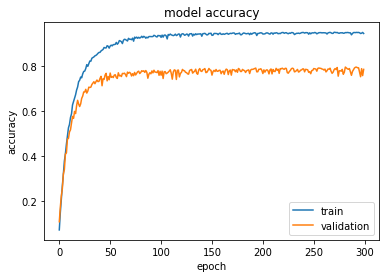

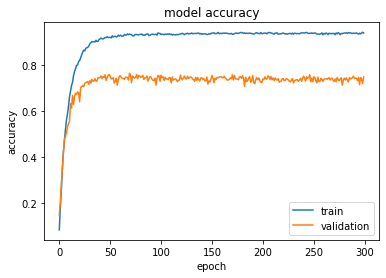

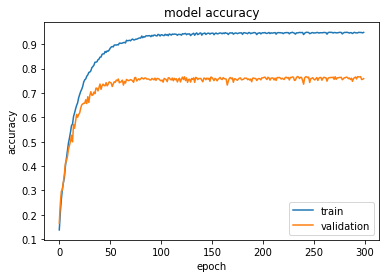

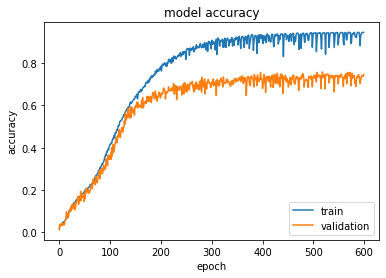

In [52]:
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

plt.plot(history_bdlstm.history['accuracy'])
plt.plot(history_bdlstm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

plt.plot(history_gru.history['accuracy'])
plt.plot(history_gru.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

plt.plot(history_LSTM.history['categorical_accuracy'])
plt.plot(history_LSTM.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

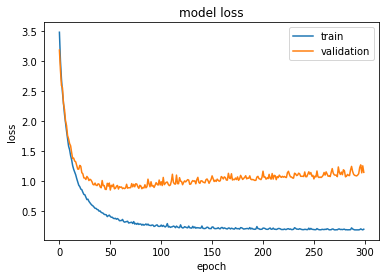

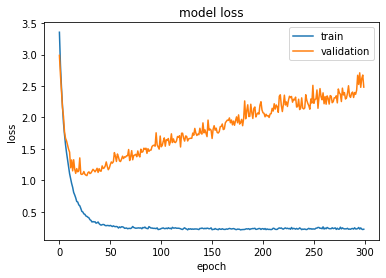

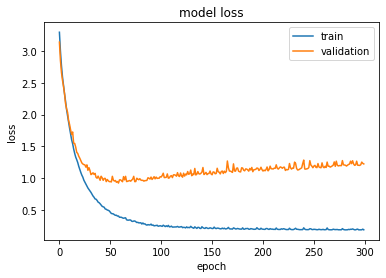

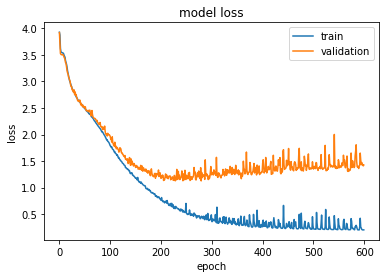

In [53]:
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(history_bdlstm.history['loss'])
plt.plot(history_bdlstm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Confussion Matrix

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=12)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize = 12)
    plt.yticks(tick_marks, classes, fontsize = 12)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize = 10)

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 8)
    plt.xlabel('Predicted label', fontsize = 8)

Normalized confusion matrix
[[0.5        0.         0.         ... 0.         0.         0.        ]
 [0.         0.9        0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.85714286 0.         0.        ]
 [0.         0.         0.         ... 0.         0.8        0.        ]
 [0.         0.         0.         ... 0.         0.         0.66666667]]


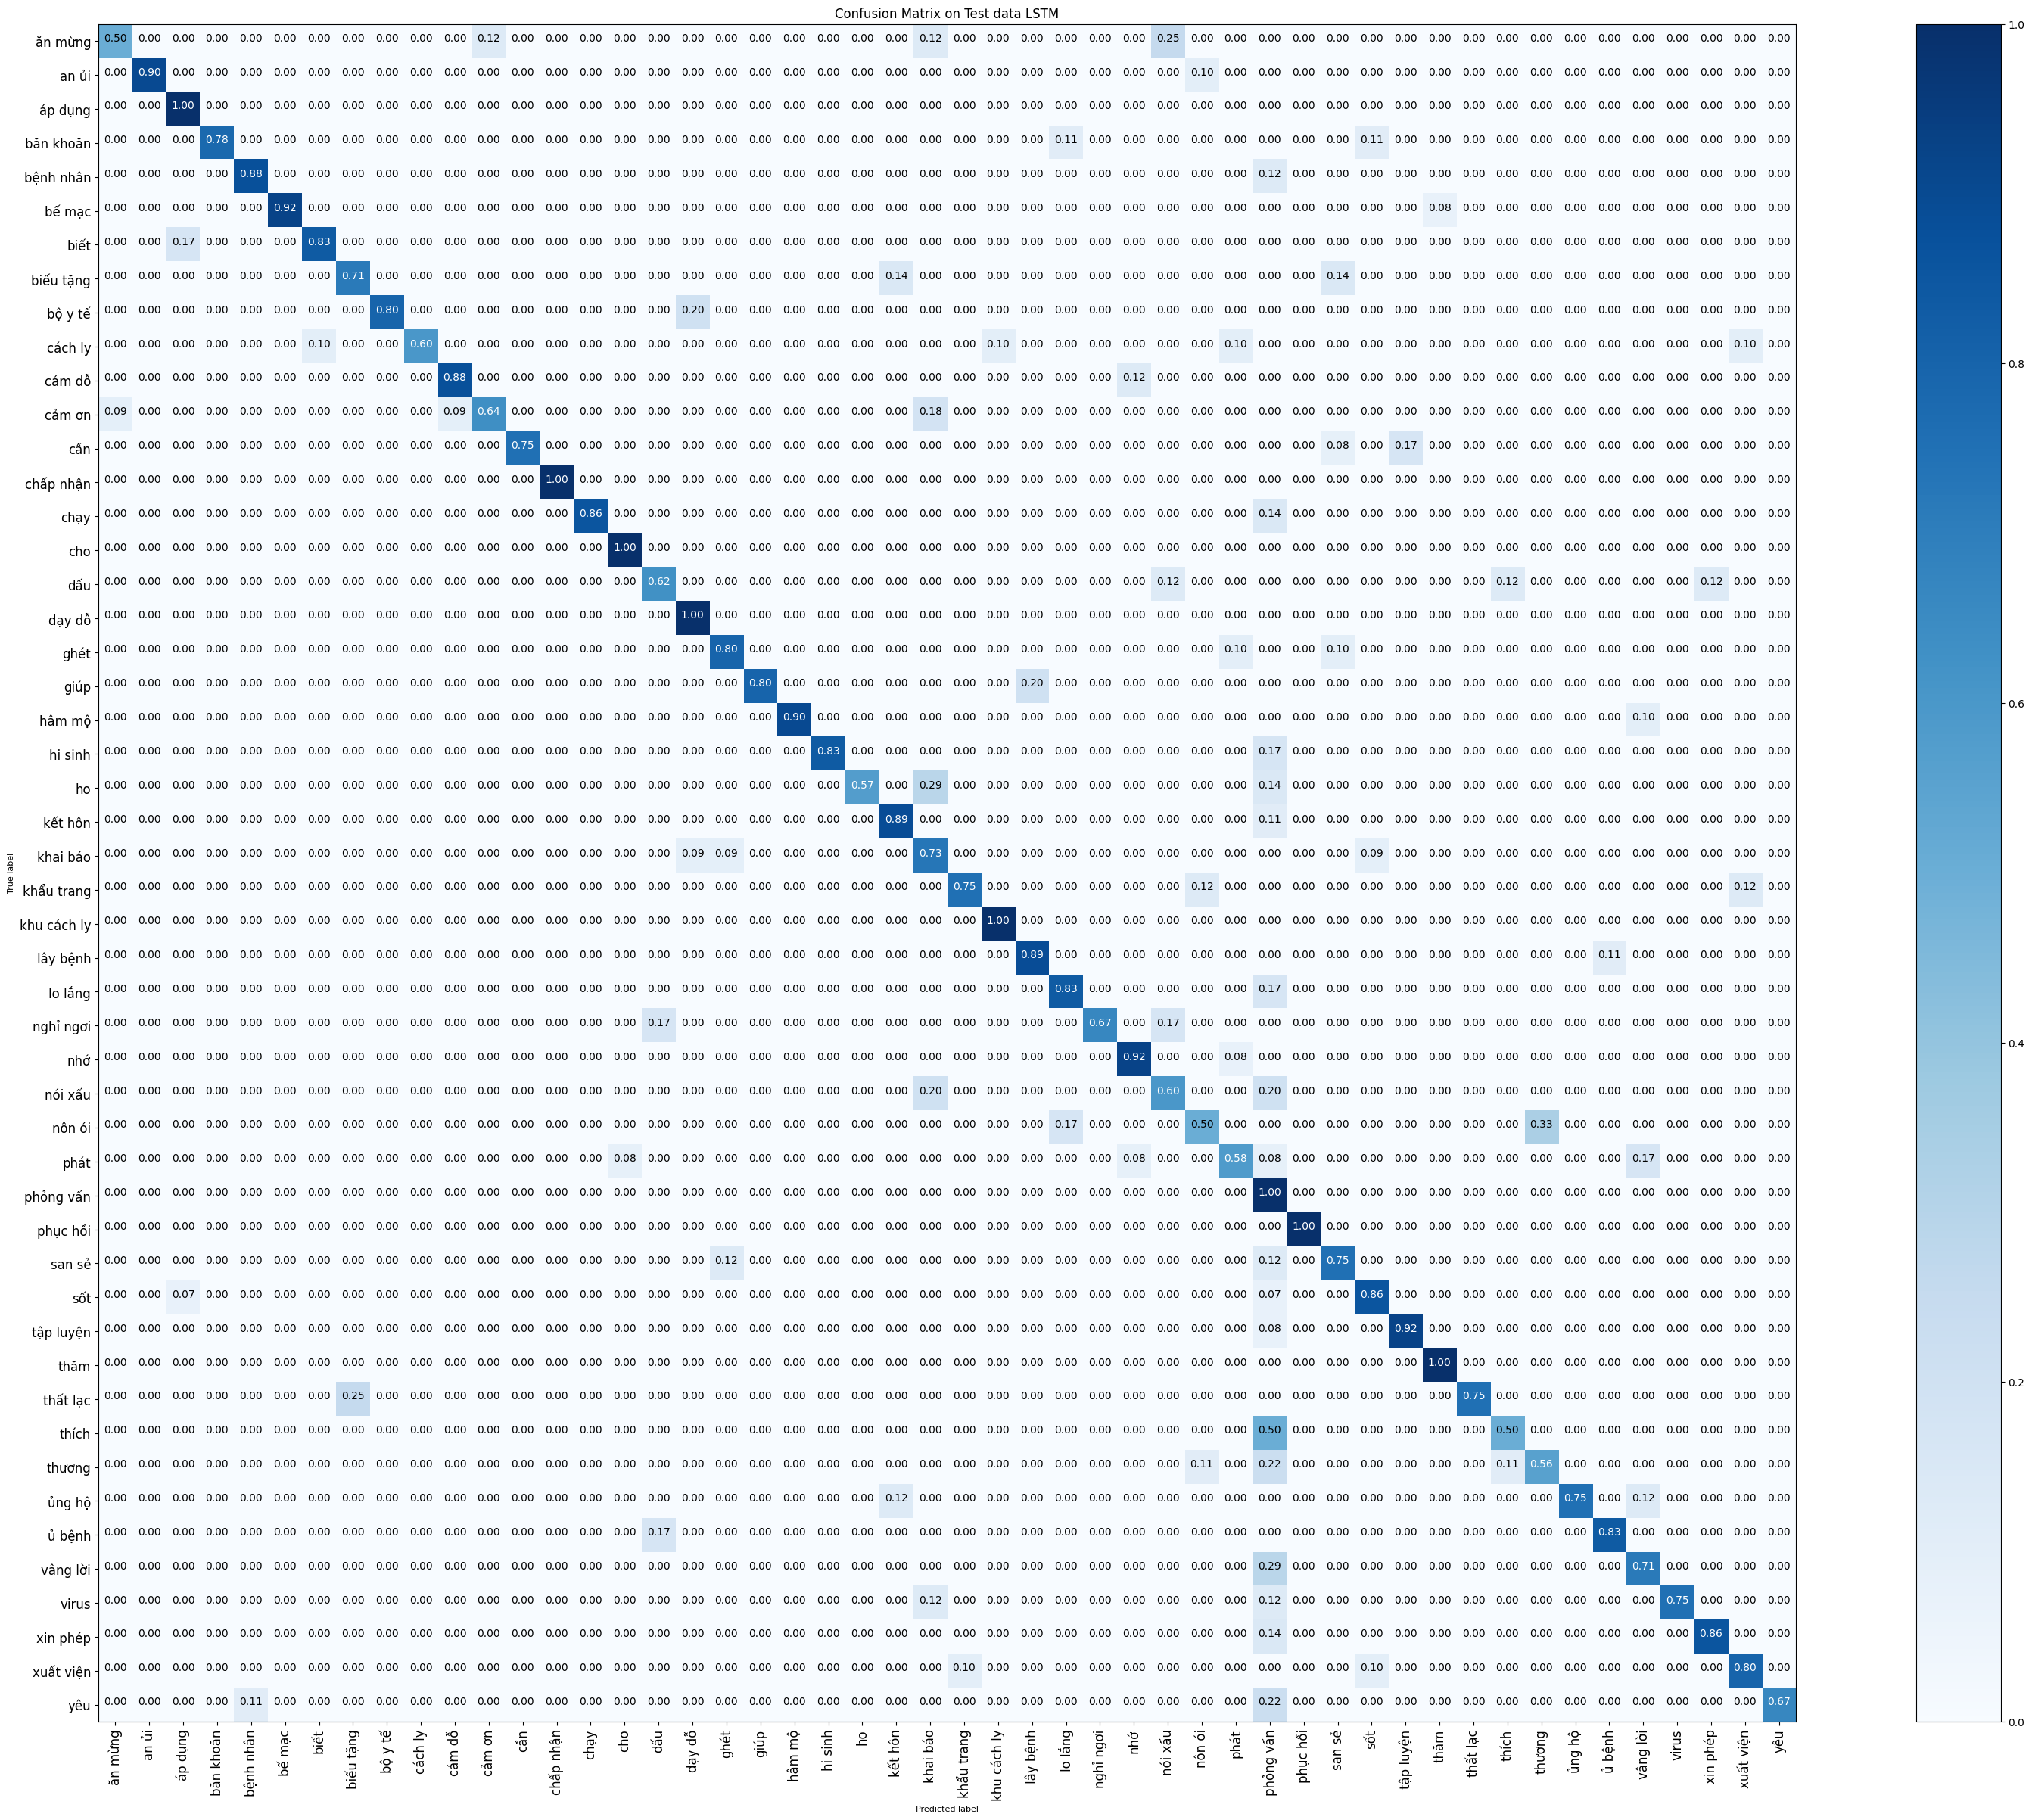

<Figure size 432x288 with 0 Axes>

In [39]:
from sklearn.metrics import confusion_matrix
import itertools

xhat_lstm = X_test
yhat_lstm = new_model_lstm.predict(xhat_lstm)


cfm_lstm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(yhat_lstm, axis=1))

plt.figure(figsize=(32,24), dpi=100)
class_names = actions

plot_confusion_matrix(cfm_lstm, classes=class_names, normalize = True,title='Confusion Matrix on Test data LSTM')
plt.show()
plt.tight_layout()
plt.savefig('lstm.png')

Normalized confusion matrix
[[0.5        0.         0.         ... 0.         0.         0.        ]
 [0.         0.7        0.         ... 0.         0.         0.        ]
 [0.         0.         0.71428571 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.71428571 0.         0.        ]
 [0.         0.         0.         ... 0.         0.7        0.        ]
 [0.         0.         0.         ... 0.         0.         0.66666667]]


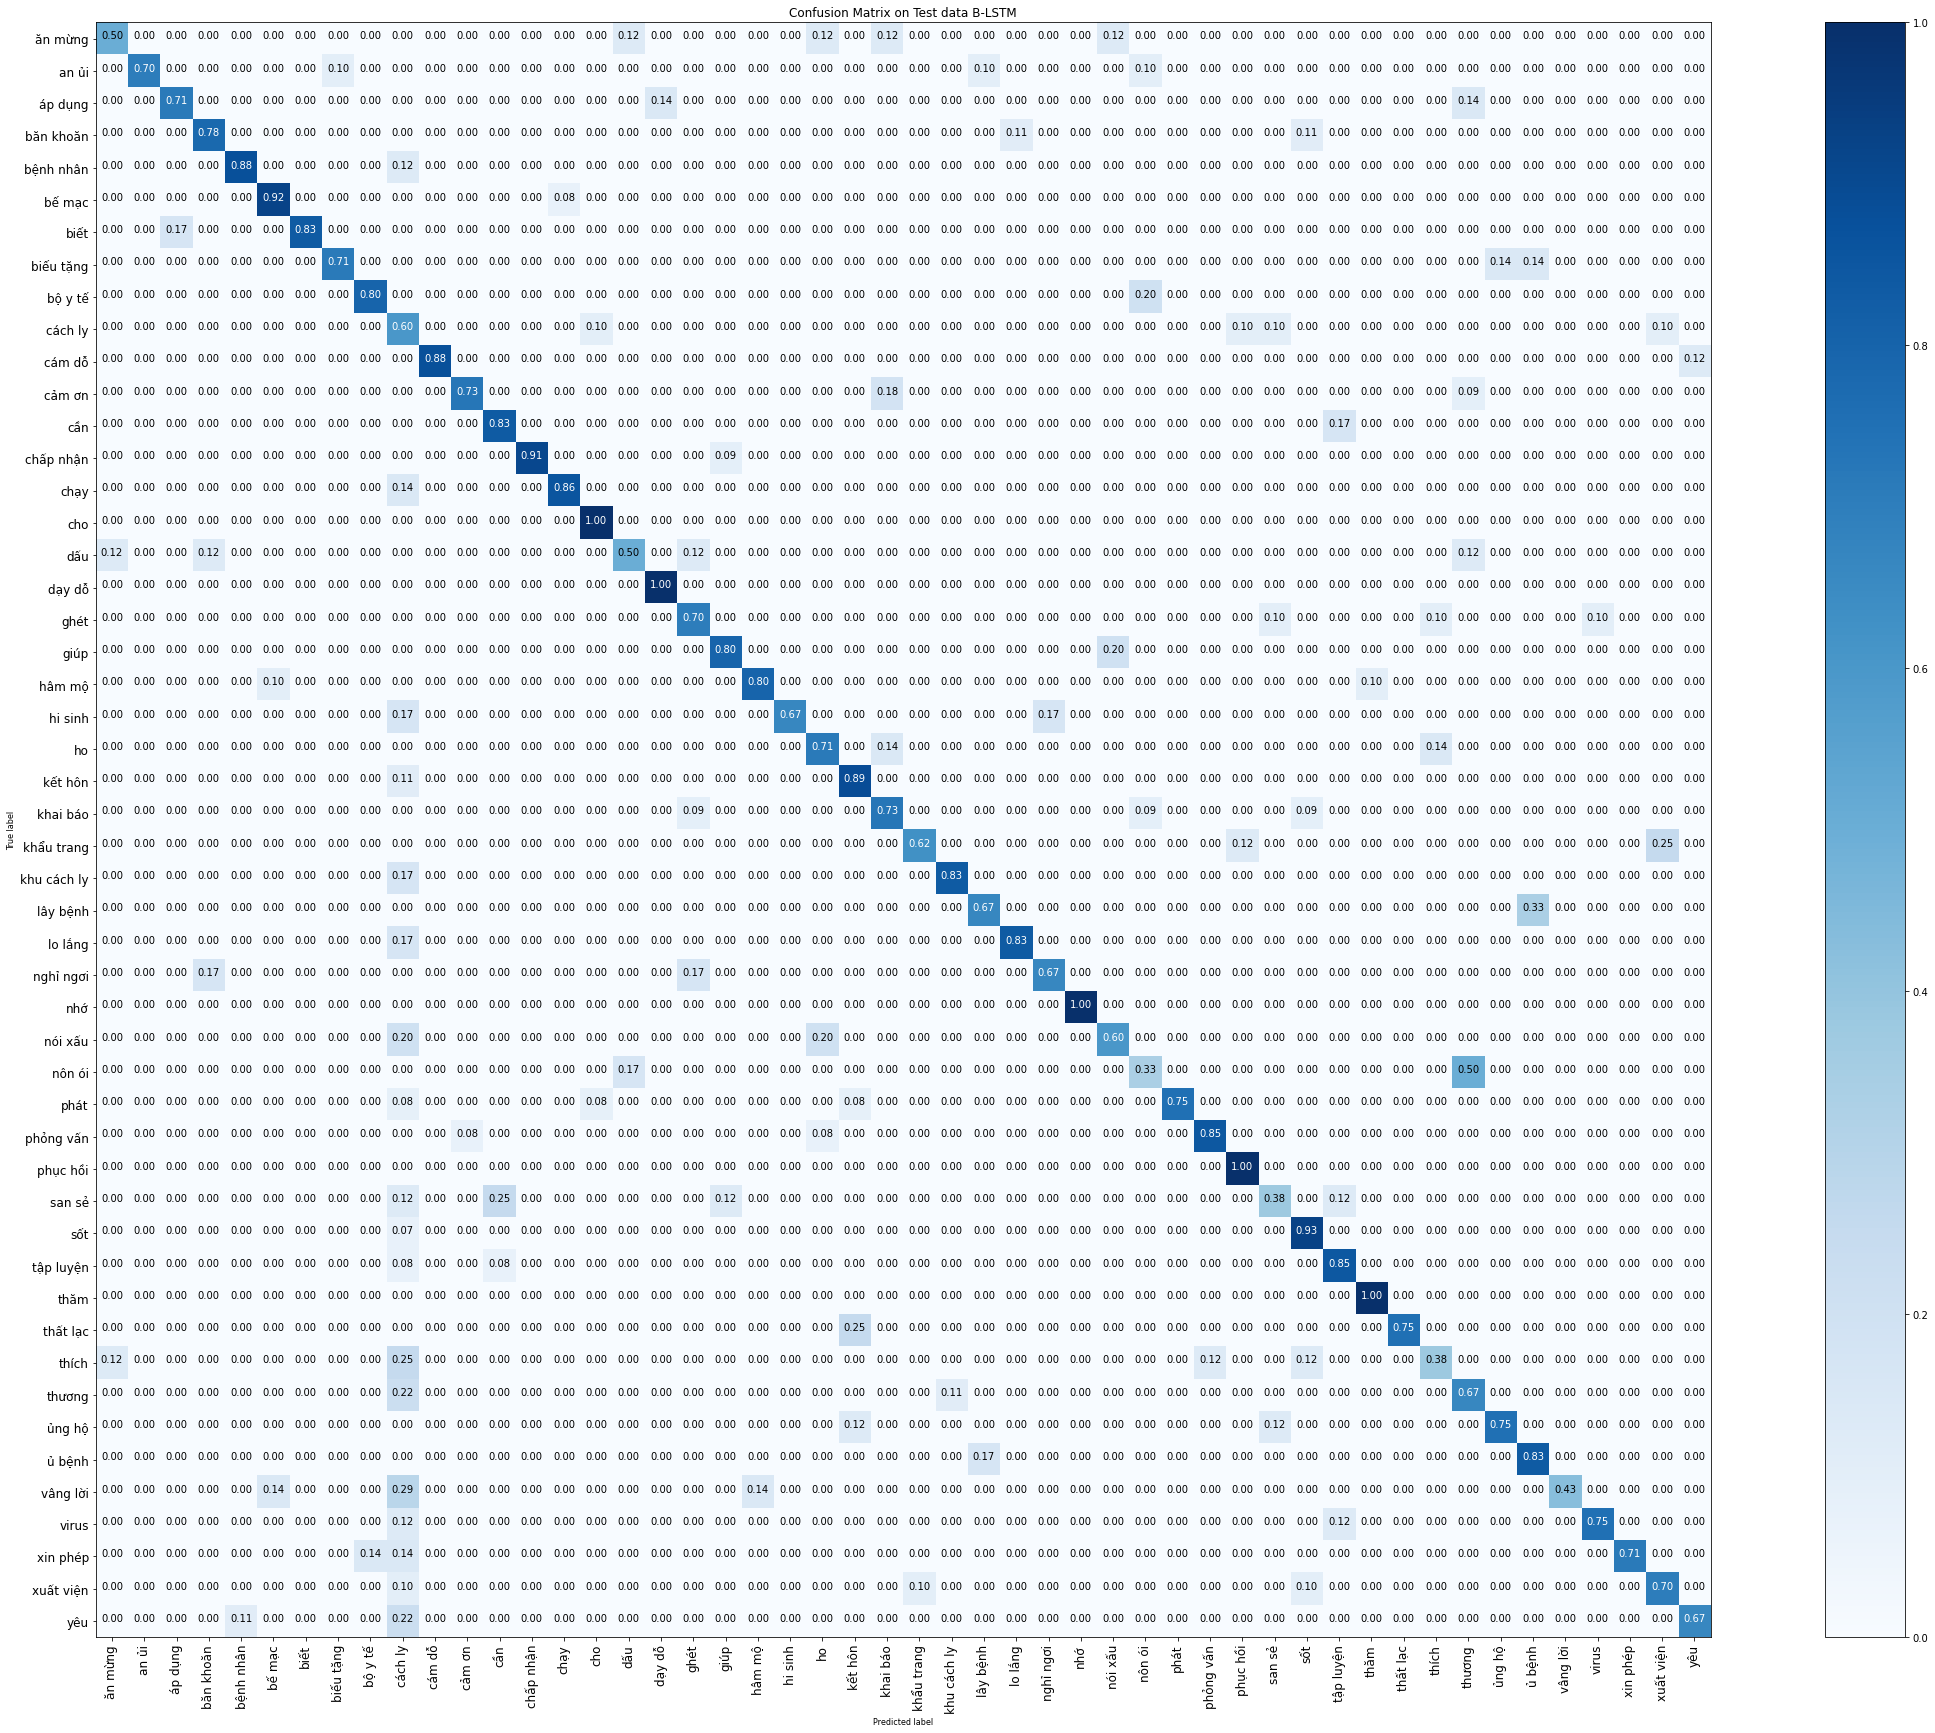

<Figure size 432x288 with 0 Axes>

In [54]:
from sklearn.metrics import confusion_matrix
import itertools

xhat_bdlstm = X_test
yhat_bdlstm = new_model_bdlstm.predict(xhat_bdlstm)


cfm_bdlstm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(yhat_bdlstm, axis=1))

plt.figure(figsize=(32,24))
class_names = actions

plot_confusion_matrix(cfm_bdlstm, classes=class_names, normalize = True,title='Confusion Matrix on Test data B-LSTM')
plt.show()
plt.tight_layout()

Normalized confusion matrix
[[0.75       0.         0.         ... 0.         0.         0.        ]
 [0.         0.9        0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.57142857 0.         0.        ]
 [0.         0.         0.         ... 0.         0.9        0.        ]
 [0.         0.         0.         ... 0.         0.         0.44444444]]


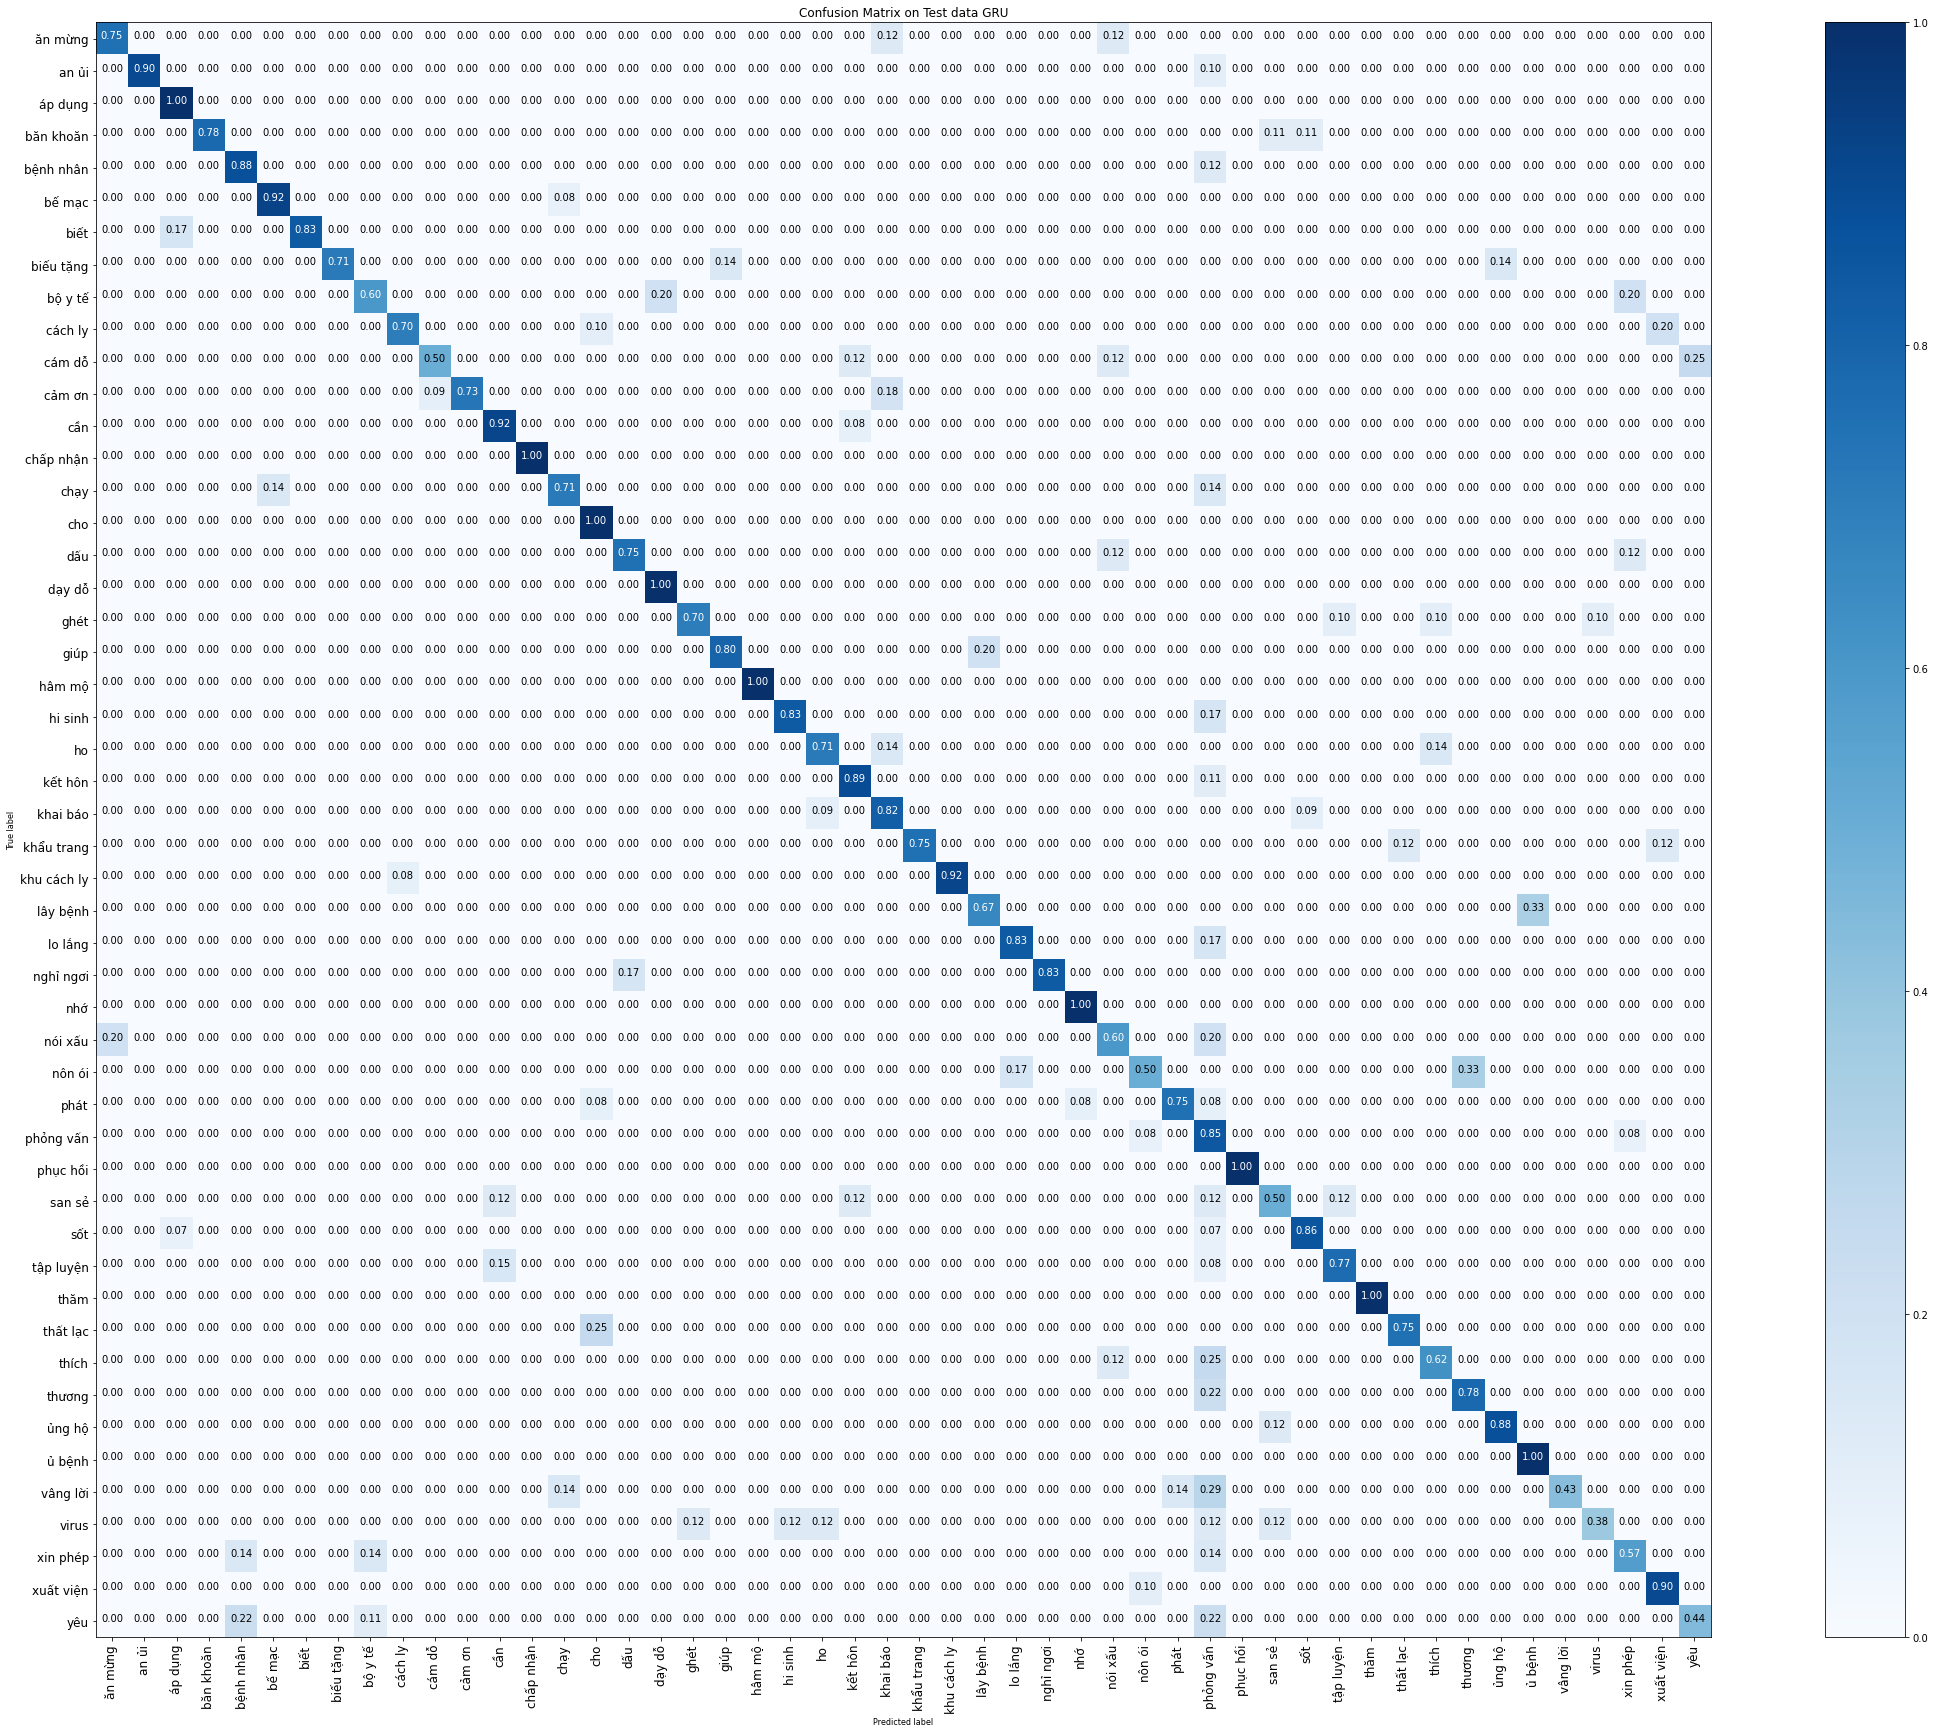

<Figure size 432x288 with 0 Axes>

In [55]:
from sklearn.metrics import confusion_matrix
import itertools

xhat_gru = X_test
yhat_gru = new_model_gru.predict(xhat_gru)


cfm_gru = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(yhat_gru, axis=1))

plt.figure(figsize=(32,24))
class_names = actions

plot_confusion_matrix(cfm_gru, classes=class_names, normalize = True,title='Confusion Matrix on Test data GRU')
plt.show()
plt.tight_layout()

Normalized confusion matrix
[[0.75       0.         0.         ... 0.         0.         0.        ]
 [0.         0.9        0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.57142857 0.         0.        ]
 [0.         0.         0.         ... 0.         0.9        0.        ]
 [0.         0.         0.         ... 0.         0.         0.44444444]]


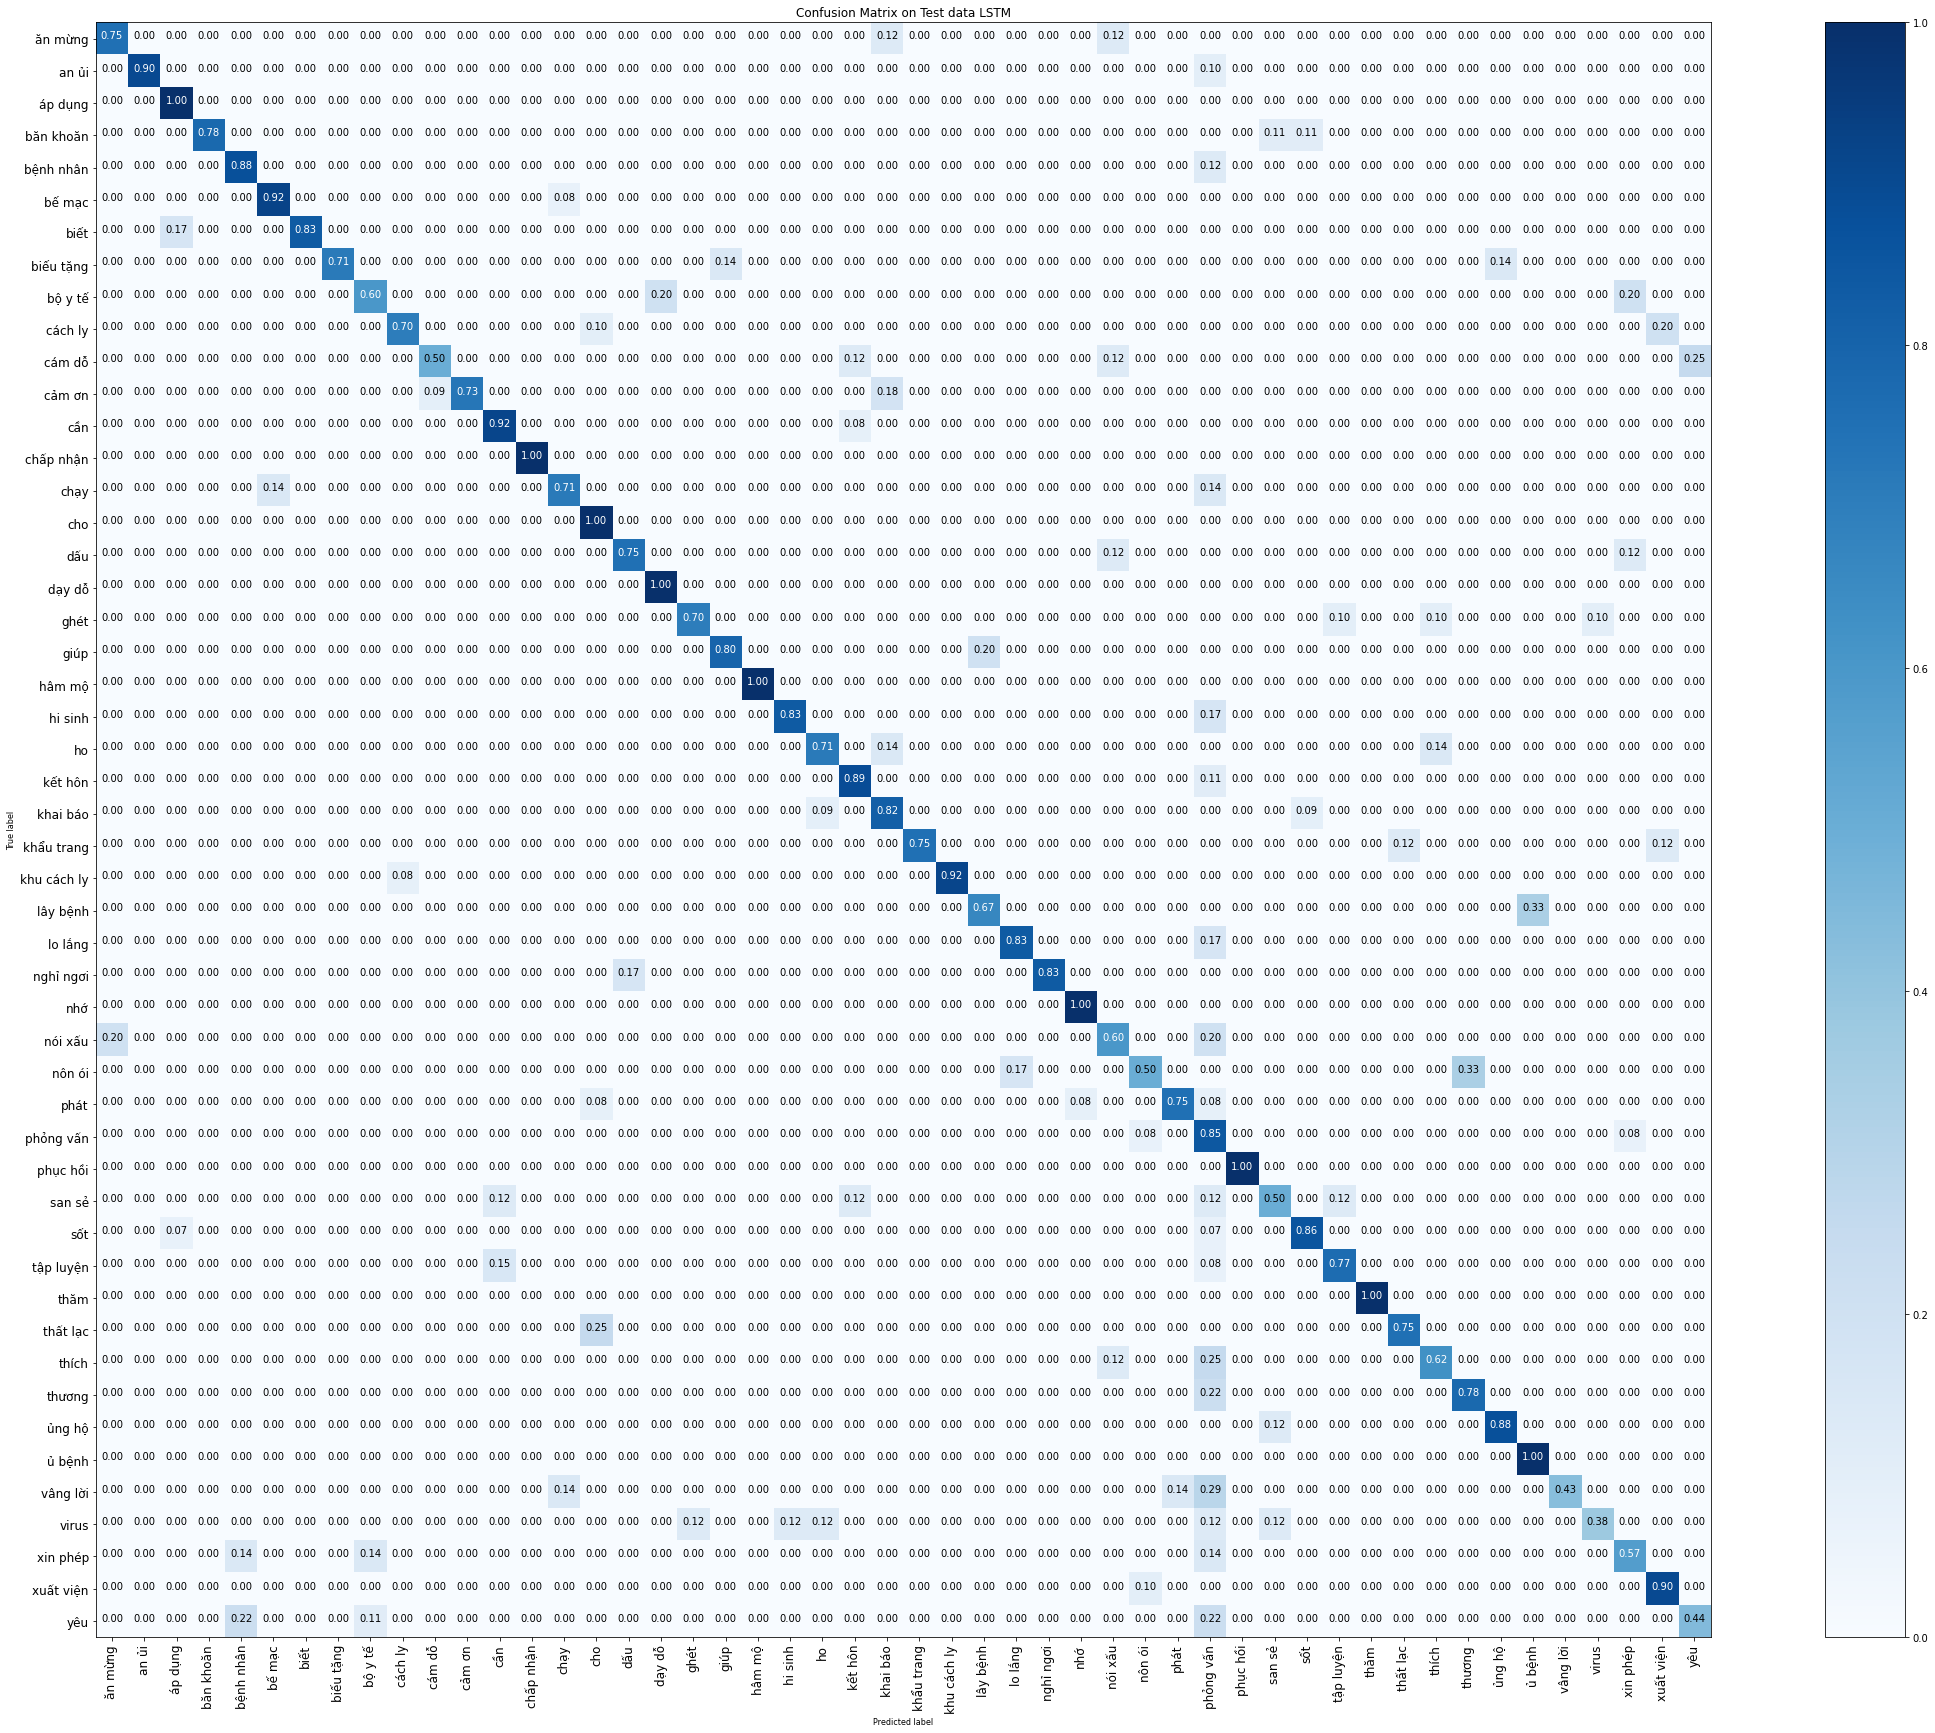

<Figure size 432x288 with 0 Axes>

In [56]:
from sklearn.metrics import confusion_matrix
import itertools

xhat_LSTM = X_test
yhat_LSTM = new_model_LSTM.predict(xhat_LSTM)


cfm_LSTM = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(yhat_LSTM, axis=1))

plt.figure(figsize=(32,24))
class_names = actions

plot_confusion_matrix(cfm_gru, classes=class_names, normalize = True,title='Confusion Matrix on Test data LSTM')
plt.show()
plt.tight_layout()